In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst

In [37]:
npb_p = pd.read_csv('./npb_투수.csv', encoding = 'cp949')
npb_b = pd.read_csv('./npb_타자.csv', encoding = 'cp949')


In [38]:
npb_p['구단'] = npb_p['구단'].str[2:]
npb_b['구단'] = npb_b['구단'].str[2:]

In [39]:
x = [8,11,12,13,26]
y = [7,14,17,22,23,39]
for i in npb_p.columns[x]:
    npb_p[i] = npb_p[i].str.replace(',','').astype(int)

for i in npb_b.columns[y]:
    npb_b[i] = npb_b[i].str.replace(',','').astype(int)

In [40]:
npb_p['QS비율'] = npb_p['QS비율'].str[:-2]
npb_p['QS비율'] = npb_p['QS비율'].astype(float)

In [41]:
npb_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      96 non-null     int64  
 1   구단      96 non-null     object 
 2   경기수     96 non-null     int64  
 3   승수      96 non-null     int64  
 4   타율      96 non-null     float64
 5   타점      96 non-null     int64  
 6   홈런      96 non-null     int64  
 7   안타수     96 non-null     int32  
 8   단타      96 non-null     int64  
 9   2루타     96 non-null     int64  
 10  3루타     96 non-null     int64  
 11  출루율     96 non-null     float64
 12  장타율     96 non-null     float64
 13  OPS     96 non-null     float64
 14  득점권 타수  96 non-null     int32  
 15  득점권 안타  96 non-null     int64  
 16  득점권     96 non-null     float64
 17  UC타수    96 non-null     int32  
 18  UC안타    96 non-null     int64  
 19  UC비율    96 non-null     float64
 20  UC홈런    96 non-null     int64  
 21  경기수.1   96 non-null     int64  
 22  타석수 

In [42]:
npb_b['경기수.1']

0     143
1     143
2     143
3     143
4     143
     ... 
91    143
92    143
93    143
94    143
95    143
Name: 경기수.1, Length: 96, dtype: int64

In [43]:
print(npb_b.columns)
print(npb_p.columns)

Index(['연도', '구단', '경기수', '승수', '타율', '타점', '홈런', '안타수', '단타', '2루타', '3루타',
       '출루율', '장타율', 'OPS', '득점권 타수', '득점권 안타', '득점권', 'UC타수', 'UC안타', 'UC비율',
       'UC홈런', '경기수.1', '타석수', '타수', '득점', '볼넷', '사구', '도루시도', '도루성공',
       '도루 성공률', '희생번트시도', '희생번트성공', '희타 성공률', '희비', '대타수', '대타 안타', '대타율',
       '병살', '실책', '피삼진'],
      dtype='object')
Index(['연도', '구단', '경기수', '승수', '방어율', '선발 방어율', '구원 방어율', '세이브', '탈삼진수',
       '투구이닝', '9이닝당 탈삼진수', '투구수', '타자수', '피안타수', '피홈런', '사구', '사사구', '고의사구',
       '실점', '자책점', '완투', '완봉', '무사사구', '피안타율', 'QS비율', 'WHIP', 'UC타수',
       'UC피안타', 'UC타율', 'UC피홈런', '홀드'],
      dtype='object')


In [44]:
npb_p2 = npb_p.drop([ '구단', '경기수', '승수'], axis = 1)
npb_b2 = npb_b.drop(['경기수.1'], axis = 1)
npb_p2.rename(columns = {'사구' : '사구 허용', 'UC타수' : 'UC타수허용', 'UC타율' : 'UC피안타율'}, inplace = True)
npb_b2.rename(columns = {'UC비율' : 'UC타율'}, inplace = True)

In [45]:
npb = pd.merge(npb_b2, npb_p2, how = 'inner', on = '연도')


In [46]:
npb['승률'] = npb['승수'] / npb['경기수'] 

In [47]:
npb_corr = npb.drop(['연도','경기수','구단'], axis = 1)

In [48]:
npb_corr.corr()

,승수,타율,타점,홈런,안타수,단타,2루타,3루타,출루율,장타율,...,무사사구,피안타율,QS비율,WHIP,UC타수허용,UC피안타,UC피안타율,UC피홈런,홀드,승률
승수,1.000000,0.529003,0.673206,0.492418,0.617921,0.420433,0.399963,0.294944,0.472845,0.537970,...,0.044564,0.028028,0.101151,-0.035248,0.315261,0.309495,0.031237,0.118165,0.093603,0.934069
타율,0.529003,1.000000,0.714299,0.394163,0.669987,0.531360,0.417241,0.204634,0.749174,0.698883,...,-0.063067,0.116931,0.011542,0.157556,-0.017643,0.041837,0.104184,0.054108,-0.074930,0.552015
타점,0.673206,0.714299,1.000000,0.764167,0.702891,0.368043,0.555376,0.240351,0.757888,0.834686,...,-0.059255,0.125685,-0.080488,0.135485,0.139114,0.190856,0.111778,0.232262,0.099138,0.606222
홈런,0.492418,0.394163,0.764167,1.000000,0.386836,-0.045864,0.346535,-0.029520,0.412439,0.893208,...,-0.050813,0.078304,-0.159317,0.094090,0.019832,0.054295,0.065601,0.192890,0.121215,0.474585
안타수,0.617921,0.669987,0.702891,0.386836,1.000000,0.877755,0.642268,0.265087,0.388057,0.422184,...,0.022938,0.086209,0.149160,0.008442,0.534568,0.543690,0.086251,0.269419,0.146241,0.375089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UC피안타,0.309495,0.041837,0.190856,0.054295,0.543690,0.549197,0.339009,0.127263,-0.081371,-0.075641,...,0.157096,0.369525,0.249416,0.133110,0.845680,1.000000,0.406920,0.304858,0.113135,0.065642
UC피안타율,0.031237,0.104184,0.111778,0.065601,0.086251,0.062285,0.051912,0.029168,0.115106,0.085948,...,0.094625,0.861043,-0.226535,0.723518,-0.140651,0.406920,1.000000,0.349621,-0.276461,0.029592
UC피홈런,0.118165,0.054108,0.232262,0.192890,0.269419,0.187106,0.202068,0.097178,0.042354,0.115778,...,0.117437,0.380488,-0.315353,0.281243,0.118229,0.304858,0.349621,1.000000,0.084615,0.011681
홀드,0.093603,-0.074930,0.099138,0.121215,0.146241,0.093589,0.116413,0.039111,-0.084915,0.016860,...,-0.252980,-0.260679,-0.382134,-0.282991,0.282802,0.113135,-0.276461,0.084615,1.000000,0.004238


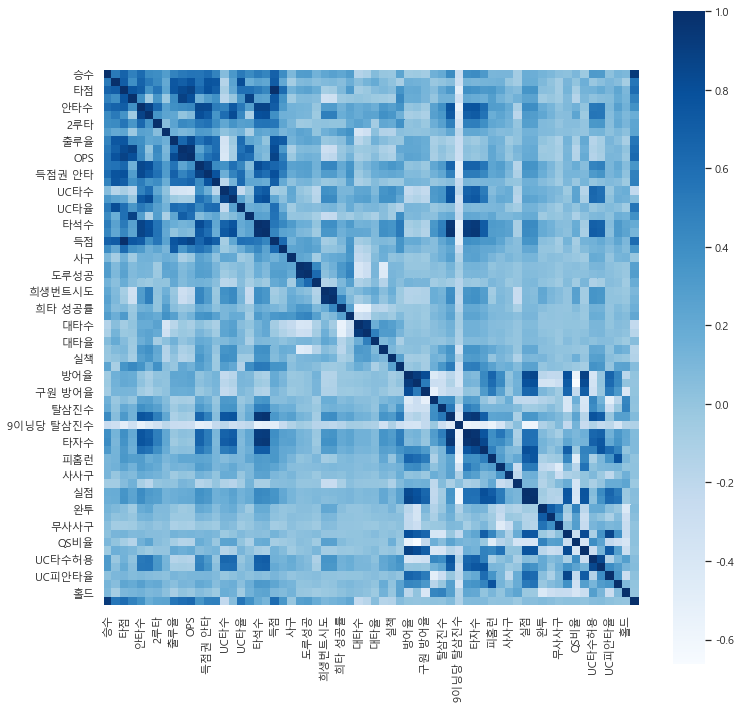

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
#상관관계 시각화
plt.figure(figsize = (12,12))
sns.heatmap(npb_corr.corr(),
            annot = False,
            cmap = 'Blues',
            square = True,
            fmt = '.2f',
            annot_kws = {'size':8})
plt.show()#몇가지 피쳐 이름 생략됨

In [54]:
npb.columns

Index(['연도', '구단', '경기수', '승수', '타율', '타점', '홈런', '안타수', '단타', '2루타', '3루타',
       '출루율', '장타율', 'OPS', '득점권 타수', '득점권 안타', '득점권', 'UC타수', 'UC안타', 'UC타율',
       'UC홈런', '타석수', '타수', '득점', '볼넷', '사구', '도루시도', '도루성공', '도루 성공률',
       '희생번트시도', '희생번트성공', '희타 성공률', '희비', '대타수', '대타 안타', '대타율', '병살', '실책',
       '피삼진', '방어율', '선발 방어율', '구원 방어율', '세이브', '탈삼진수', '투구이닝', '9이닝당 탈삼진수',
       '투구수', '타자수', '피안타수', '피홈런', '사구 허용', '사사구', '고의사구', '실점', '자책점', '완투',
       '완봉', '무사사구', '피안타율', 'QS비율', 'WHIP', 'UC타수허용', 'UC피안타', 'UC피안타율',
       'UC피홈런', '홀드', '승률'],
      dtype='object')

In [51]:
npb2 = npb.drop(['출루율','장타율','득점권 타수', '득점권 안타', 'UC타수', 'UC안타',
                 '타석수', '타수', '도루시도', '도루성공', '희생번트시도', '희생번트성공',
                 '대타수', '대타 안타','방어율','탈삼진수', '투구이닝','투구수', '타자수',
                 '피안타수','UC타수허용', 'UC피안타'], axis = 1)

In [65]:
target = '승률'
# 데이터 분리
x = npb2[npb2.columns.difference(['경기수','구단', '연도', '정규순위', '승수', '승률'])]
y = npb2[target] 

In [66]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [67]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     승률   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     30.58
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          2.70e-129
Time:                        10:26:24   Log-Likelihood:                 1423.1
No. Observations:                 806   AIC:                            -2766.
Df Residuals:                     766   BIC:                            -2578.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5459      0.168     -3.250      0.001      -0.876      -0.216
2루타           -0.0003      0.000     -2.312      0.021      -0.001   -4.63e-05
3루타            0.0008      0.000      2.888      0.004       0.000       0.001
9이닝당 탈삼진수      0.0015      0.001      2.057      0.040    6.97e-05       0.003
OPS           -0.4395      1.158     -0.379      0.704      -2.713       1.834
QS비율          -0.0015      0.000     -3.161      0.002      -0.002      -0.001
UC타율           1.4325      0.234      6.112      0.000       0.972       1.893
UC피안타율         0.3364      0.249      1.351      0.177      -0.152       0.825
UC피홈런          0.0005      0.000      1.557      0.120      -0.000       0.001
UC홈런           0.0013      0.000      3.952      0.000       0.001       0.002
WHIP           0.0436      0.293      0.149      0.882      -0.532       0.619
고의사구          -0.0004      0.000     -2.535      0.011      -0.001      -0.000
구원 방어율        -0.0664      0.017     -4.010      0.000      -0.099      -0.034
단타            -0.0005      0.000     -1.508      0.132      -0.001       0.000
대타율            0.0677      0.052      1.297      0.195      -0.035       0.170
도루 성공률         0.1266      0.030      4.209      0.000       0.068       0.186
득점             0.0024      0.000      6.529      0.000       0.002       0.003
득점권            0.1099      0.215      0.512      0.609      -0.311       0.531
무사사구           0.0007      0.002      0.373      0.709      -0.003       0.005
병살            -0.0006      0.000     -3.307      0.001      -0.001      -0.000
볼넷             0.0001      0.000      0.804      0.422      -0.000       0.000
사구            -0.0002      0.000     -1.050      0.294      -0.001       0.000
사구 허용       -5.81e-05      0.000     -0.251      0.802      -0.001       0.000
사사구            0.0002      0.000      1.154      0.249      -0.000       0.000
선발 방어율        -0.1608      0.031     -5.115      0.000      -0.223      -0.099
세이브            0.0009      0.000      2.567      0.010       0.000       0.002
실점          9.149e-05      0.000      0.535      0.593      -0.000       0.000
실책            -0.0006      0.000     -4.266      0.000      -0.001      -0.000
안타수           -0.0003      0.000     -1.455      0.146      -0.001       0.000
완봉             0.0013      0.001      1.040      0.299      -0.001       0.004
완투            -0.0004      0.001     -0.485      0.628      -0.002       0.001
자책점            0.0014      0.000      3.258      0.001       0.001       0.002
타율             5.6314      3.083      1.827      0.068      -0.421      11.684
타점            -0.0021      0.000     -5.520      0.000      -0.003      -0.001
피삼진        -1.596e-05   2.97e-05     -0.537      0.592   -7.43e-05    4.24e-05
피안타율           0.5704      1.455      0.392      0.695      -2.287       3.428
피홈

In [69]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["FACTOR"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["FEATURES"] = x.columns
vif.round(1)

c:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,FACTOR,FEATURES
0,inf,2루타
1,inf,3루타
2,6.8,9이닝당 탈삼진수
3,270483.9,OPS
4,228.5,QS비율
5,1519.0,UC타율
6,1734.1,UC피안타율
7,109.1,UC피홈런
8,139.8,UC홈런
9,51033.1,WHIP


In [70]:
npb_re = npb2[npb2.columns.difference(['2루타', '3루타', '안타수', '홈런', '단타'])]

In [71]:
target = '승률'
# 데이터 분리
x = npb_re[npb_re.columns.difference(['경기수','구단', '연도', '정규순위', '승수', '승률'])]
y = npb_re[target] 

In [72]:
# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#회귀분석
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     승률   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     31.47
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          4.16e-124
Time:                        10:30:43   Log-Likelihood:                 1402.6
No. Observations:                 806   AIC:                            -2733.
Df Residuals:                     770   BIC:                            -2564.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3984      0.162     -2.456      0.014      -0.717      -0.080
9이닝당 탈삼진수      0.0013      0.001      1.757      0.079      -0.000       0.003
OPS            0.6502      0.292      2.229      0.026       0.078       1.223
QS비율          -0.0010      0.000     -2.068      0.039      -0.002   -4.93e-05
UC타율           1.4391      0.234      6.148      0.000       0.980       1.899
UC피안타율         0.1192      0.251      0.475      0.635      -0.374       0.612
UC피홈런          0.0004      0.000      1.346      0.179      -0.000       0.001
UC홈런           0.0005      0.000      1.595      0.111      -0.000       0.001
WHIP           0.2103      0.297      0.708      0.479      -0.373       0.793
고의사구          -0.0004      0.000     -2.260      0.024      -0.001   -5.29e-05
구원 방어율        -0.0169      0.012     -1.366      0.172      -0.041       0.007
대타율            0.0744      0.052      1.423      0.155      -0.028       0.177
도루 성공률         0.0966      0.030      3.223      0.001       0.038       0.155
득점             0.0021      0.000      5.959      0.000       0.001       0.003
득점권            0.2425      0.209      1.160      0.246      -0.168       0.653
무사사구           0.0011      0.002      0.576      0.565      -0.003       0.005
병살            -0.0008      0.000     -4.333      0.000      -0.001      -0.000
볼넷          7.647e-05   4.84e-05      1.581      0.114   -1.85e-05       0.000
사구            -0.0003      0.000     -1.856      0.064      -0.001    1.74e-05
사구 허용         -0.0002      0.000     -0.731      0.465      -0.001       0.000
사사구            0.0002      0.000      1.462      0.144   -7.56e-05       0.001
선발 방어율        -0.0710      0.024     -2.950      0.003      -0.118      -0.024
세이브            0.0007      0.000      1.903      0.057   -2.07e-05       0.001
실점             0.0001      0.000      0.673      0.501      -0.000       0.000
실책            -0.0008      0.000     -5.653      0.000      -0.001      -0.000
완봉             0.0014      0.001      1.044      0.297      -0.001       0.004
완투            -0.0005      0.001     -0.555      0.579      -0.002       0.001
자책점            0.0003      0.000      0.833      0.405      -0.000       0.001
타율            -0.5617      0.694     -0.810      0.418      -1.924       0.800
타점            -0.0021      0.000     -5.407      0.000      -0.003      -0.001
피삼진         -5.83e-05   2.93e-05     -1.990      0.047      -0.000   -7.83e-07
피안타율          -0.0141      1.482     -0.010      0.992      -2.923       2.895
피홈런           -0.0005      0.000     -2.397      0.017      -0.001   -8.41e-05
홀드             0.0001      0.000      0.986      0.325      -0.000       0.000
희비            -0.0003      0.000     -1.042      0.298      -0.001       0.000
희타 성공률         0.0620      0.037      1.679      0.093      -0.010       0.134
==

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["FACTOR"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["FEATURES"] = x.columns
vif.round(1)

,FACTOR,FEATURES
0,6.4,9이닝당 탈삼진수
1,15630.7,OPS
2,200.3,QS비율
3,1415.8,UC타율
4,1692.7,UC피안타율
5,108.9,UC피홈런
6,108.7,UC홈런
7,50334.9,WHIP
8,5.4,고의사구
9,732.3,구원 방어율


In [75]:
npb_re2 = npb_re.drop(['피안타율', '사사구', '볼넷', 
                       '고의사구', '타점', '득점', '자책점', '사구 허용'], axis = 1)

In [76]:
target = '승률'
# 데이터 분리
x = npb_re2[npb_re2.columns.difference(['경기수','구단', '연도', '정규순위', '승수', '승률'])]
y = npb_re2[target] 

In [77]:
# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#회귀분석
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     승률   R-squared:                       0.554
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     35.74
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          5.68e-117
Time:                        10:37:08   Log-Likelihood:                 1369.8
No. Observations:                 806   AIC:                            -2684.
Df Residuals:                     778   BIC:                            -2552.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6202      0.109     -5.710      0.000      -0.833      -0.407
9이닝당 탈삼진수      0.0012      0.001      1.641      0.101      -0.000       0.003
OPS            0.9053      0.159      5.707      0.000       0.594       1.217
QS비율          -0.0005      0.000     -1.205      0.229      -0.001       0.000
UC타율           1.4899      0.242      6.159      0.000       1.015       1.965
UC피안타율         0.3156      0.207      1.527      0.127      -0.090       0.721
UC피홈런          0.0005      0.000      1.516      0.130      -0.000       0.001
UC홈런           0.0003      0.000      1.276      0.202      -0.000       0.001
WHIP           0.0931      0.063      1.487      0.137      -0.030       0.216
구원 방어율        -0.0134      0.007     -2.064      0.039      -0.026      -0.001
대타율            0.1202      0.053      2.249      0.025       0.015       0.225
도루 성공률         0.1367      0.030      4.537      0.000       0.078       0.196
득점권            0.2765      0.176      1.568      0.117      -0.070       0.623
무사사구           0.0006      0.002      0.314      0.753      -0.003       0.004
병살            -0.0008      0.000     -4.717      0.000      -0.001      -0.000
사구            -0.0003      0.000     -1.648      0.100      -0.001    5.23e-05
선발 방어율        -0.0589      0.012     -4.902      0.000      -0.082      -0.035
세이브            0.0009      0.000      2.560      0.011       0.000       0.002
실점             0.0003      9e-05      3.440      0.001       0.000       0.000
실책            -0.0005      0.000     -4.066      0.000      -0.001      -0.000
완봉             0.0013      0.001      1.033      0.302      -0.001       0.004
완투            -0.0001      0.001     -0.139      0.890      -0.002       0.002
타율            -0.6343      0.571     -1.110      0.267      -1.756       0.487
피삼진        -2.535e-05   2.84e-05     -0.892      0.373   -8.11e-05    3.04e-05
피홈런           -0.0004      0.000     -2.159      0.031      -0.001   -3.73e-05
홀드             0.0001      0.000      0.743      0.457      -0.000       0.000
희비             0.0001      0.000      0.427      0.670      -0.000       0.001
희타 성공률         0.1155      0.037      3.120      0.002       0.043       0.188
==============================================================================
Omnibus:                       55.446   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.408
Skew:                          -0.078   Prob(JB):                     3.70e-05
Kurtosis:                       2.236   Cond. No.                     4.49e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+05. This might i

In [99]:
npb_final = npb_re2.drop(['9이닝당 탈삼진수', 'QS비율', '득점권','무사사구',
                          '사구', '완봉', '완투', '타율', '피삼진', '홀드', '희비',
                          'UC피안타율', '피홈런', 'OPS', 'WHIP','세이브',
                          'UC피홈런', '세이브', '구원 방어율', '선발 방어율'], axis = 1)

In [100]:
target = '승률'
# 데이터 분리
x = npb_final[npb_final.columns.difference(['경기수','구단', '연도', '정규순위', '승수', '승률'])]
y = npb_final[target] 

In [101]:
# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

#회귀분석
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     승률   R-squared:                       0.476
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     90.46
Date:                Thu, 16 Mar 2023   Prob (F-statistic):          1.79e-106
Time:                        10:46:51   Log-Likelihood:                 1305.1
No. Observations:                 806   AIC:                            -2592.
Df Residuals:                     797   BIC:                            -2550.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3951      0.051     -7.687      0.000      -0.496      -0.294
UC타율           2.7288      0.146     18.710      0.000       2.442       3.015
UC홈런           0.0017      0.000     11.566      0.000       0.001       0.002
대타율            0.1804      0.054      3.356      0.001       0.075       0.286
도루 성공률         0.1807      0.028      6.480      0.000       0.126       0.235
병살            -0.0009      0.000     -5.838      0.000      -0.001      -0.001
실점         -7.402e-05   2.84e-05     -2.609      0.009      -0.000   -1.83e-05
실책            -0.0005      0.000     -3.869      0.000      -0.001      -0.000
희타 성공률         0.1272      0.034      3.704      0.000       0.060       0.195
==============================================================================
Omnibus:                       51.497   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.311
Skew:                          -0.058   Prob(JB):                     6.41e-05
Kurtosis:                       2.251   Cond. No.                     5.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["FACTOR"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["FEATURES"] = x.columns
vif.round(1)

,FACTOR,FEATURES
0,307.5,UC타율
1,19.7,UC홈런
2,47.9,대타율
3,115.6,도루 성공률
4,66.9,병살
5,87.3,실점
6,26.7,실책
7,196.0,희타 성공률


In [109]:
npb_uc = npb[['UC타율','UC홈런','UC피홈런','승률']]

In [110]:
target = '승률'
# 데이터 분리
x = npb_uc.drop(target, axis=1)
y = npb_uc.loc[:, target]

# 학습용, 평가용 데이터 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [111]:
#회귀분석
x_train = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     승률   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     164.5
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           4.27e-83
Time:                        10:54:58   Log-Likelihood:                 1238.0
No. Observations:                 806   AIC:                            -2468.
Df Residuals:                     802   BIC:                            -2449.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2496      0.040     -6.297      0.000      -0.327      -0.172
UC타율           2.7465      0.156     17.639      0.000       2.441       3.052
UC홈런           0.0016      0.000     10.117      0.000       0.001       0.002
UC피홈런         -0.0007      0.000     -3.390      0.001      -0.001      -0.000
==============================================================================
Omnibus:                       16.957   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.375
Skew:                           0.011   Prob(JB):                      0.00921
Kurtosis:                       2.472   Cond. No.                     6.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["FACTOR"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["FEATURES"] = x.columns
vif.round(1)

,FACTOR,FEATURES
0,42.6,UC타율
1,19.2,UC홈런
2,32.5,UC피홈런


## NPB에서는 KBO에서 사용하지 않는 지표인 'UC'라는 지표가 있다.

### VDUCP(UC) 산출 방법
### 1. 타석에 서는 시점에서의 득점차를 산출하고,
### 2. 홈런이 나오면 동점, 이기고, 역전이 되는 장면이라면 VDUCP(UC) 타수로서 
### 카운트합니다.